In [4]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sklearn.utils.multiclass import type_of_target
import math

In [5]:
def woe(X, y, event):
    res_woe = [] #列表存放woe字典
    res_iv = [] #列表存放iv
    X1 = feature_discretion(X) #对连续型特征进行处理
    for i in range(0, X1.shape[-1]): #遍历所有特征
        x = X1[:,i] #单个特征
        woe_dict, iv1 = woe_single_x(x, y, event)
        res_woe.append(woe_dict)
        res_iv.append(iv1)
    #return np.array(res_woe), np.array(res_iv)
    return np.array(res_iv)
        

In [6]:
def woe_single_x(x, y, event):
    event_total, non_event_total = count_binary(y, event)
    x_labels = np.unique(x) 
    woe_dict = {} #存放每个分段的名称以及对应的woe值
    iv = 0
    for x1 in x_labels:
        y1 = y[np.where(x == x1)[0]]
        event_count, non_event_count = count_binary(y1, event=event)
        rate_event = 1.0 * event_count / event_total
        rate_non_event = 1.0 * non_event_count / non_event_total
        
        if rate_event == 0:
            print("doushihaode")
        elif rate_non_event == 0:
            print("doushihuairen")
        else:
            woe1 = math.log(rate_event / rate_non_event)
            woe_dict[x1] = woe1
            iv += (rate_event - rate_non_event) * woe1
    return woe_dict, iv

In [7]:
def count_binary(a, event):
    event_count = (a == event).sum()
    non_event_count = a.shape[-1] - event_count
    return event_count, non_event_count

In [8]:
def feature_discretion(X):
    temp = []
    for i in range(0, X.shape[-1]):
        x = X[:, i]
        x_type = type_of_target(x)
        if pd.Series(list(x)).dtype != 'O':
            x1 = discrete(x)
            temp.append(x1)
        else:
            temp.append(x)
    return np.array(temp).T

In [9]:
def discrete(x):
    res = np.array([0] * x.shape[-1], dtype=int)
    for i in range(10):
        point1 = stats.scoreatpercentile(x, i * 10)
        point2 = stats.scoreatpercentile(x, (i + 1) * 10)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = (i + 1)
    return res

In [10]:
IgAN = pd.read_csv('C:\\Users\\Administrator\\Desktop\\PLAN\\IgAN.csv',encoding = 'gb18030')

In [11]:
dummy_fields = ['gender','uC3','a2-m','nag','rbp','uac','hypertension']
for each in dummy_fields:
    a = pd.get_dummies(IgAN[each],prefix=each)
    #IgAN = pd.concat([IgAN,dummies])
    IgAN = pd.concat([IgAN,a],axis=1)
fiels_to_drop = ['gender','uC3','a2-m','nag','rbp','uac','hypertension']
IgAN =IgAN.drop(fiels_to_drop,axis=1)

In [12]:
IgAN

,age,sc1,al,chol,trig,uric,up,plabum,copC3,M,...,a2-m_a2-m_abnormal,a2-m_a2-m_normal,nag_nag_abnormal,nag_nag_normal,rbp_rbp_abnormal,rbp_rbp_normal,uac_uac_abnormal,uac_uac_normal,hypertension_hyp_no,hypertension_hyp_yes
0,1,25.000,15.0,12.96,2.56,385.0,2.05,15.0,1.000,1,...,0,1,1,0,0,1,1,0,0,1
1,2,39.000,16.6,6.36,1.56,467.0,3.58,16.6,1.070,1,...,0,1,1,0,0,1,1,0,1,0
2,2,128.000,40.4,4.76,1.25,389.0,0.89,40.4,1.070,1,...,0,1,1,0,1,0,1,0,1,0
3,3,23.000,42.4,4.81,0.43,148.0,0.10,42.4,0.928,0,...,0,1,1,0,0,1,0,1,0,1
4,3,22.000,24.8,9.76,2.71,225.0,5.12,24.8,1.160,2,...,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,18,60.996,41.1,4.11,1.37,322.0,1.09,41.1,1.000,1,...,1,0,1,0,0,1,0,1,1,0
1147,18,59.228,47.1,2.34,0.51,248.0,1.07,47.1,1.000,1,...,0,1,1,0,0,1,0,1,1,0
1148,18,116.688,34.7,8.72,2.12,541.0,4.27,34.7,1.410,3,...,1,0,1,0,1,0,1,0,0,1
1149,18,58.344,33.2,5.93,1.00,312.0,2.86,33.2,1.250,2,...,1,0,1,0,0,1,0,1,0,1


In [13]:
IgAN = IgAN.dropna(axis=0, how='any')
y = IgAN['ESK'].values
X = IgAN.drop(['ESK'],axis=1).values
feature = IgAN.drop(['ESK'],axis=1)
X.shape

(1143, 43)

In [14]:
feature
a = woe(X, y, 1)

In [15]:
a
a.shape
#dic = dict(zip(np.array(res_iv),X))
IgAN


,age,sc1,al,chol,trig,uric,up,plabum,copC3,M,...,a2-m_a2-m_abnormal,a2-m_a2-m_normal,nag_nag_abnormal,nag_nag_normal,rbp_rbp_abnormal,rbp_rbp_normal,uac_uac_abnormal,uac_uac_normal,hypertension_hyp_no,hypertension_hyp_yes
0,1,25.000,15.0,12.96,2.56,385.0,2.05,15.0,1.000,1,...,0,1,1,0,0,1,1,0,0,1
1,2,39.000,16.6,6.36,1.56,467.0,3.58,16.6,1.070,1,...,0,1,1,0,0,1,1,0,1,0
2,2,128.000,40.4,4.76,1.25,389.0,0.89,40.4,1.070,1,...,0,1,1,0,1,0,1,0,1,0
3,3,23.000,42.4,4.81,0.43,148.0,0.10,42.4,0.928,0,...,0,1,1,0,0,1,0,1,0,1
4,3,22.000,24.8,9.76,2.71,225.0,5.12,24.8,1.160,2,...,0,1,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,18,83.096,45.3,3.42,1.52,417.0,0.52,45.3,1.000,1,...,0,1,1,0,0,1,1,0,0,1
1146,18,60.996,41.1,4.11,1.37,322.0,1.09,41.1,1.000,1,...,1,0,1,0,0,1,0,1,1,0
1147,18,59.228,47.1,2.34,0.51,248.0,1.07,47.1,1.000,1,...,0,1,1,0,0,1,0,1,1,0
1148,18,116.688,34.7,8.72,2.12,541.0,4.27,34.7,1.410,3,...,1,0,1,0,1,0,1,0,0,1


In [16]:
b = IgAN[['age','sc1','al','chol','trig','uric','up','plabum','copC3','M','E','S','T','C','IgA','IgG','IgM','blC3','C4','C1q','ACEI/ARB','免疫抑制治疗','降脂','扁桃体切除','袢坏死','球性硬化%','节段硬化%','动脉透明变性','新月体%','uC3_uC3_normal','uC3_uC3_abnormal','a2-m_a2-m_abnormal','a2-m_a2-m_normal','nag_nag_abnormal','nag_nag_normal','rbp_rbp_abnormal','rbp_rbp_normal','uac_uac_abnormal','uac_uac_normal','hypertension_hyp_no','hypertension_hyp_yes','gender_M','gender_F']]
dic = dict(zip(b, a))
dic_sort= sorted(dic.items(),key = lambda x:x[1],reverse = True)
dic_sort

[('sc1', 1.2106753946448514),
 ('球性硬化%', 0.6118196861270488),
 ('up', 0.5253810820616199),
 ('uric', 0.5173648675993058),
 ('T', 0.4289025312475898),
 ('uac_uac_abnormal', 0.3970366114471468),
 ('uac_uac_normal', 0.3970366114471468),
 ('S', 0.38036098731229245),
 ('age', 0.3649126730149771),
 ('M', 0.3605215487031701),
 ('节段硬化%', 0.29965082799722764),
 ('trig', 0.22423886804720047),
 ('nag_nag_abnormal', 0.21688036362408408),
 ('nag_nag_normal', 0.21688036362408408),
 ('al', 0.18969689178176533),
 ('plabum', 0.1893983116134599),
 ('hypertension_hyp_no', 0.17900999994451885),
 ('hypertension_hyp_yes', 0.17900999994451885),
 ('chol', 0.1629037423648884),
 ('gender_M', 0.15870893937572977),
 ('gender_F', 0.15870893937572977),
 ('rbp_rbp_abnormal', 0.11317414138938486),
 ('rbp_rbp_normal', 0.11317414138938486),
 ('copC3', 0.07702476348805645),
 ('C', 0.06636393326214456),
 ('降脂', 0.05187540546601161),
 ('ACEI/ARB', 0.05135807005122421),
 ('uC3_uC3_normal', 0.03568256043045543),
 ('uC3_uC3_

In [17]:
import datetime
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from mlxtend.classifier import StackingClassifier,EnsembleVoteClassifier
from sklearn import model_selection
#from sklearn import cross_validation
#from sklearn.cross_validation import KFold
from matplotlib.font_manager import FontProperties

In [18]:
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [19]:
from pandas import DataFrame
Y = IgAN['ESK']
X = IgAN[['sc1','nag_nag_abnormal','M','球性硬化%','节段硬化%','T','uac_uac_abnormal']]
#X = IgAN[['球性硬化%','降脂','T','节段硬化%','sc1','gender_M','M','动脉透明变性','C','nag_nag_abnormal']]
#X = IgAN[['sc1','球性硬化%','up','uric','T','uac_uac_abnormal','S','age','M','节段硬化%','trig','nag_nag_abnormal','al','plabum','hypertension_hyp_no','chol','gender_M','rbp_rbp_abnormal']]
#X = IgAN[['sc1','球性硬化%','up','uric','T','gender_M','S','age','M','节段硬化%','trig','nag_nag_abnormal']]
#X = IgAN[['age','sc1','al','chol','trig','uric','up','plabum','copC3','M','E','S','T','C','IgA','IgG','IgM','blC3','C4','C1q','ACEI/ARB','免疫抑制治疗','降脂','扁桃体切除','袢坏死','球性硬化%','节段硬化%','动脉透明变性','新月体%','uC3_uC3_normal','uC3_uC3_abnormal','a2-m_a2-m_abnormal','a2-m_a2-m_normal','nag_nag_abnormal','nag_nag_normal','rbp_rbp_abnormal','rbp_rbp_normal','uac_uac_abnormal','uac_uac_normal','hypertension_hyp_no','hypertension_hyp_yes','gender_M','gender_F']]

In [20]:
import random
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.5,random_state=1)

In [21]:
import lightgbm as lgb
lgb

<module 'lightgbm' from 'C:\\Users\\Administrator\\anaconda3\\lib\\site-packages\\lightgbm\\__init__.py'>

In [22]:
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from sklearn.metrics import roc_curve, auc, f1_score
clf1 = lgb.LGBMClassifier()
clf2 = xgb.XGBClassifier()
clf3 = ctb.CatBoostClassifier()
ada = AdaBoostClassifier()
gb =GradientBoostingClassifier()
et = ExtraTreesClassifier()

In [23]:
clf2.fit(X_train, y_train)
y_pred_val = clf2.predict(X_test)
predictions_val = [value for value in y_pred_val]
accuracy_val = accuracy_score(y_test, predictions_val)
print("Accuracy_val: %.2f%%" % (accuracy_val*100.0))
score = clf2.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, score)
roc_auc = auc(fpr, tpr)
roc_auc
print("roc_auc: %.2f" % roc_auc)

Accuracy_val: 92.48%
roc_auc: 0.62


In [24]:
List = sorted([*zip(X, clf2.feature_importances_)])
List

[('M', 0.16068326),
 ('T', 0.13192748),
 ('nag_nag_abnormal', 0.15344834),
 ('sc1', 0.121165894),
 ('uac_uac_abnormal', 0.080793135),
 ('球性硬化%', 0.20396431),
 ('节段硬化%', 0.14801759)]

In [53]:
print(X.shape)
X_test.shape
X_train.shape

(571, 7)

In [91]:
cv_params = {'learning_rate': [0.6,0.7,0.8]}
other_params = {'learning_rate': 0.7, 'n_estimators':310, 'max_depth': 14, 'min_child_weight': 1, 'seed': 0,
                     'colsample_bytree': 0.8, 'gamma': 0,'subsample':1, 'reg_alpha': 0.1, 'reg_lambda': 1, 'scale_pos_weight':191}
model = xgb.XGBClassifier(**other_params
                            #max_depth=5
                       #   ,learning_rate=0.02
                       #   ,n_estimators=500
                        #  ,booster='gbtree'
                         # ,subsample=0.91
                        #  ,reg_alpha=0.09
                       #  ,reg_lamda=0.05
                       #  ,scale_pos_weight=1.5
)
print(model.subsample)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, y_train)



evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))


# y_pred_val = optimized_GBM.predict(X_test)
# predictions_val = [value for value in y_pred_val]
# accuracy_val = accuracy_score(y_test, predictions_val)
# print("Accuracy_val: %.2f%%" % (accuracy_val*100.0))

score = optimized_GBM.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, score)
roc_auc = auc(fpr, tpr)
roc_auc
print("roc_auc: %.2f" % roc_auc)     

1
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    7.3s finished


参数的最佳取值：{'learning_rate': 0.7}
最佳模型得分:0.751745537259556
roc_auc: 0.60


In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score
model = xgb.XGBClassifier(#**other_params
                             max_depth=14
                            ,learning_rate=0.02
                            ,n_estimators=272
                            ,booster='gbtree'
                            ,subsample=1
                            ,reg_alpha=0.15
                            ,reg_lamda=12
                            ,colsample_bytree = 1
                            ,scale_pos_weight=191
                            
)
#print(X)
model.fit(X_train, y_train)
y_pred_val = model.predict(X_test)
predictions_val = [value for value in y_pred_val]
accuracy_val = accuracy_score(y_test, predictions_val)
print("Accuracy_val: %.2f%%" % (accuracy_val*100.0))

score = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, score)
roc_auc = auc(fpr, tpr)
roc_auc
print("roc_auc: %.4f" % roc_auc)

Accuracy_val: 90.38%
roc_auc: 0.7226


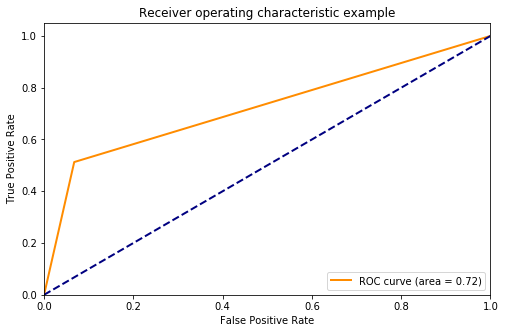

In [107]:
lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()